In [293]:
%matplotlib inline
import matplotlib.pyplot as plt
import noise
import numpy as np
from PIL import Image
import math

In [294]:
shape = (1024, 1024)
octaves = 6
persistence = 0.5
lacunarity = 2.0

In [295]:
def create_world(base=0, scale=100.0):
    world = np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            world[i][j] = noise.pnoise2(i/scale,
                                        j/scale,
                                        octaves=octaves,
                                        persistence=persistence,
                                        lacunarity=lacunarity,
                                        repeatx=1024,
                                        repeaty=1024,
                                        base=base)
    
    return world

In [302]:
world = create_world()

In [300]:
def show_gray(world, size=14):
    fig = plt.figure(figsize = (size, size))
    axis = fig.add_subplot(111)
    axis.imshow(world, cmap='gray')
    
def show_rgb(color_world, size=14):
    im = Image.fromarray(color_world)
    im.save('noise.jpg')
    im = Image.open('noise.jpg', 'r')
    
    fig = plt.figure(figsize = (size, size))
    axis = fig.add_subplot(111)
    axis.imshow(np.asarray(im))

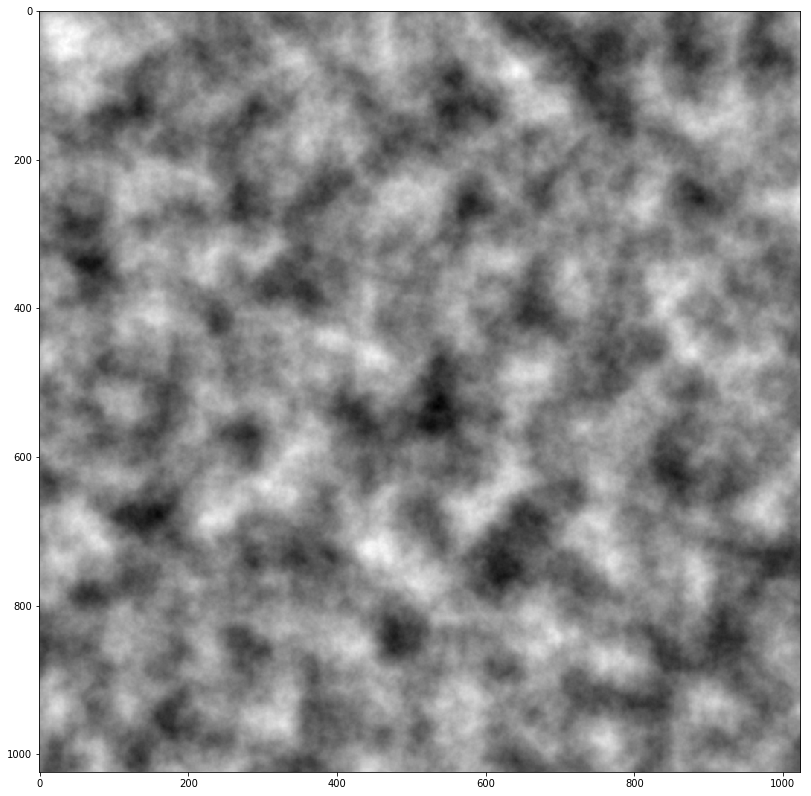

In [301]:
show_gray(world)

In [251]:
blue = [65,105,225]
green = [34,139,34]
beach = [238, 214, 175]
snow = [255, 250, 250]
mountain = [139, 137, 137]

In [252]:
def add_color(world):
    color_world = np.zeros(world.shape+(3,), 'uint8')
    for i in range(shape[0]):
        for j in range(shape[1]):
            if world[i][j] < -0.05:
                color_world[i][j] = blue
            elif world[i][j] < 0.0:
                color_world[i][j] = beach
            elif world[i][j] < 0.2:
                color_world[i][j] = green
            elif world[i][j] < 0.35:
                color_world[i][j] = mountain
            elif world[i][j] < 1.0:
                color_world[i][j] = snow
    
    return color_world

In [253]:
color_world = add_color(world)

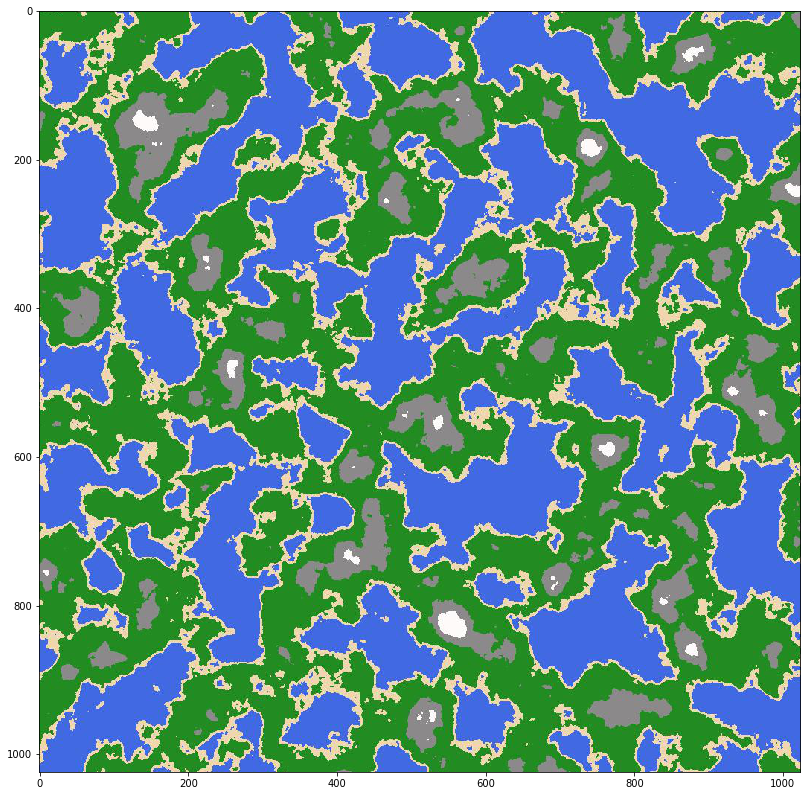

In [254]:
show_rgb(color_world)

In [223]:
# circular mask
a, b = shape[0]/2, shape[1]/2
n = 1024
r = 125

y, x = np.ogrid[-a:n-a,-b:n-b]
mask = x**2 + y**2 <= r**2

black = [0, 0, 0]
island_world = np.zeros_like(color_world)

for i in range(shape[0]):
    for j in range(shape[1]):
        if mask[i][j]:
            island_world[i][j] = color_world[i][j]
        else:
            island_world[i][j] = black

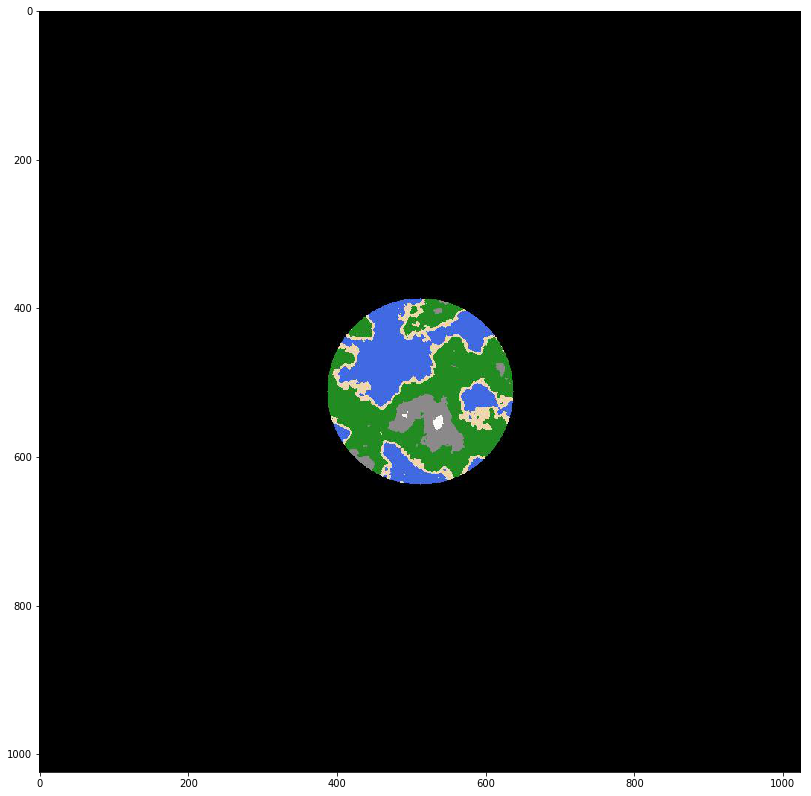

In [224]:
show_rgb(island_world)

In [231]:
center_x, center_y = shape[1] // 2, shape[0] // 2
circle_grad = np.zeros_like(world)

for y in range(world.shape[0]):
    for x in range(world.shape[1]):
        distx = abs(x - center_x)
        disty = abs(y - center_y)
        dist = math.sqrt(distx*distx + disty*disty)
        circle_grad[x][y] = dist

# get between -1 and 1
max_grad = np.max(circle_grad)
circle_grad = circle_grad/max_grad

circle_grad -= 0.5
circle_grad *= 2.0
circle_grad = -circle_grad

# shrink the gradient
for y in range(world.shape[0]):
    for x in range(world.shape[1]):
        if circle_grad[x][y] > 0:
            circle_grad[x][y] *= 20

max_grad = np.max(circle_grad)
circle_grad = circle_grad/max_grad

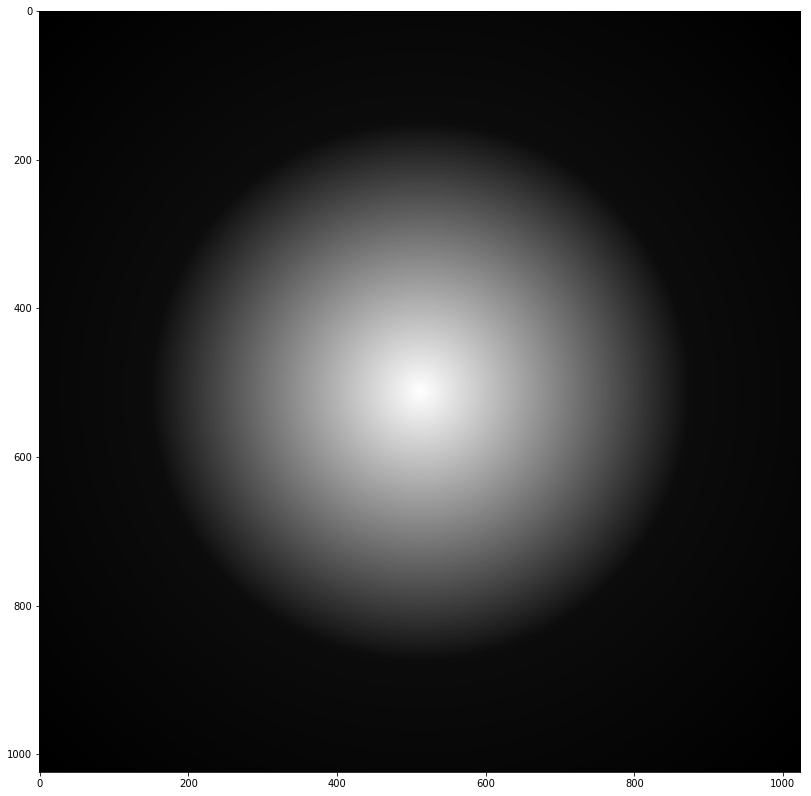

In [232]:
show_gray(circle_grad)

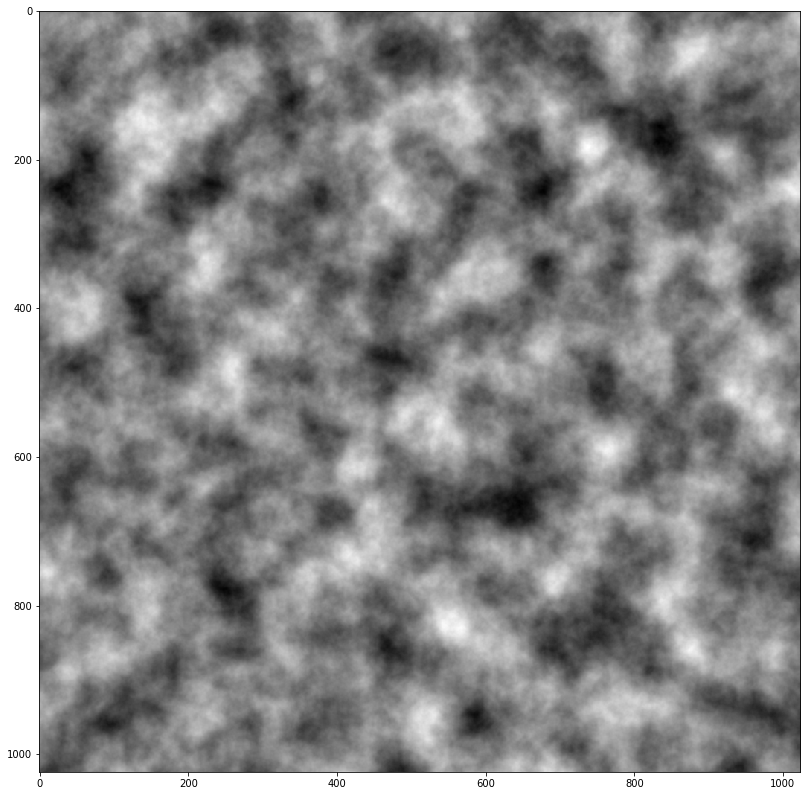

In [228]:
show_gray(world)

In [306]:
def create_world_noise(base=0, scale=100.0):
    world = create_world(base, scale)
    world_noise = np.zeros_like(world)

    for i in range(shape[0]):
        for j in range(shape[1]):
            world_noise[i][j] = (world[i][j] * circle_grad[i][j])
            if world_noise[i][j] > 0:
                world_noise[i][j] *= 20

    max_grad = np.max(world_noise)
    world_noise = world_noise/max_grad
    
    return world_noise

In [311]:
world_noise = create_world_noise()

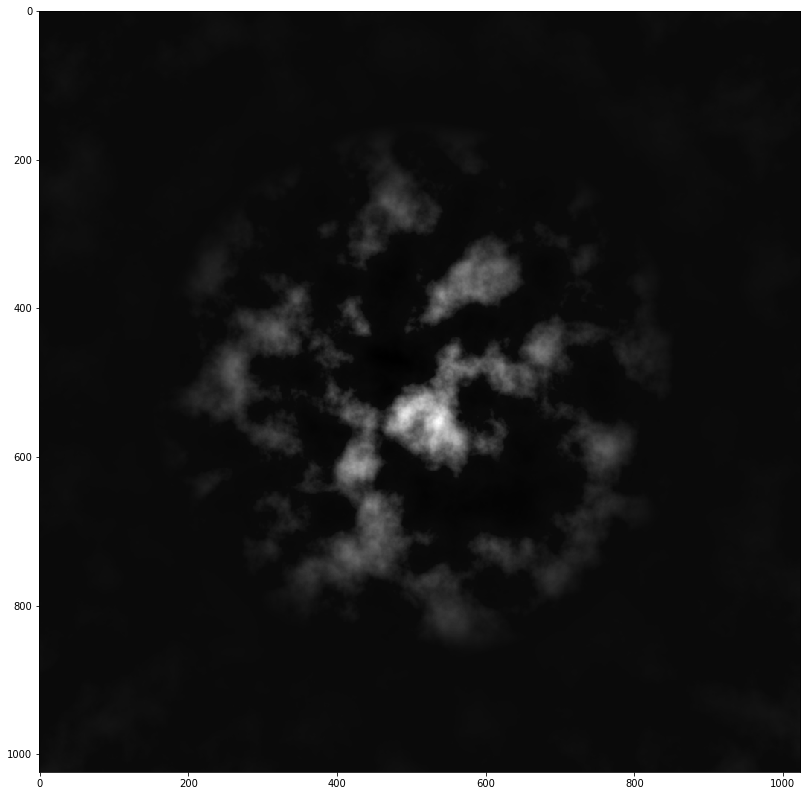

In [312]:
show_gray(world_noise)

In [268]:
lightblue = [0,191,255]
blue = [65,105,225]
green = [34,139,34]
darkgreen = [0,100,0]
sandy = [210,180,140]
beach = [238, 214, 175]
snow = [255, 250, 250]
mountain = [139, 137, 137]

def add_color2(world, threshold=0.0):
    color_world = np.zeros(world.shape+(3,), 'uint8')
    for i in range(shape[0]):
        for j in range(shape[1]):
            if world[i][j] < threshold + 0.05:
                color_world[i][j] = blue
            elif world[i][j] < threshold + 0.055:
                color_world[i][j] = sandy
            elif world[i][j] < threshold + 0.1:
                color_world[i][j] = beach
            elif world[i][j] < threshold + 0.25:
                color_world[i][j] = green
            elif world[i][j] < threshold + 0.6:
                color_world[i][j] = darkgreen
            elif world[i][j] < threshold + 0.7:
                color_world[i][j] = mountain
            elif world[i][j] < threshold + 1.0:
                color_world[i][j] = snow

    return color_world

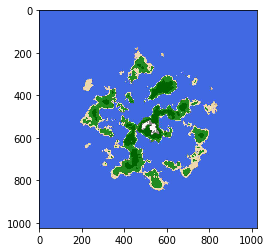

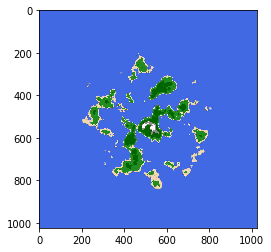

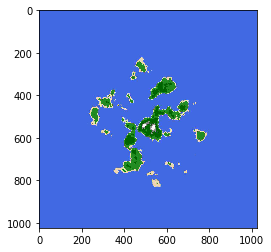

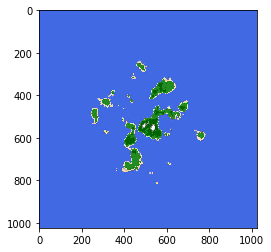

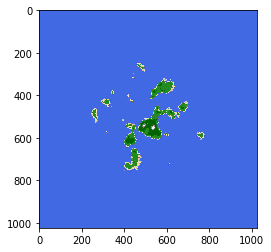

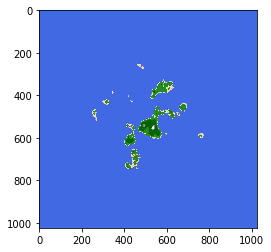

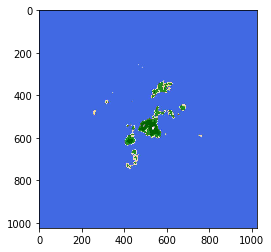

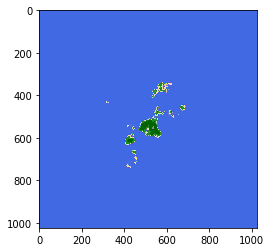

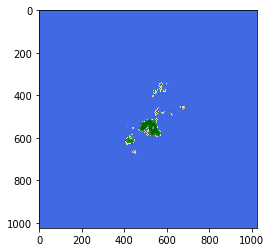

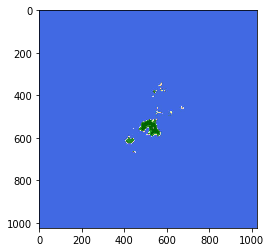

In [287]:
# threshold plots
for i in range(10):
    island_world_grad = add_color2(world_noise, 0.04 * i)
    show_rgb(island_world_grad, 4)

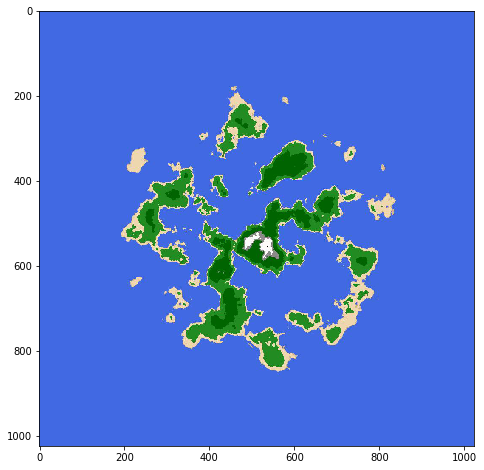

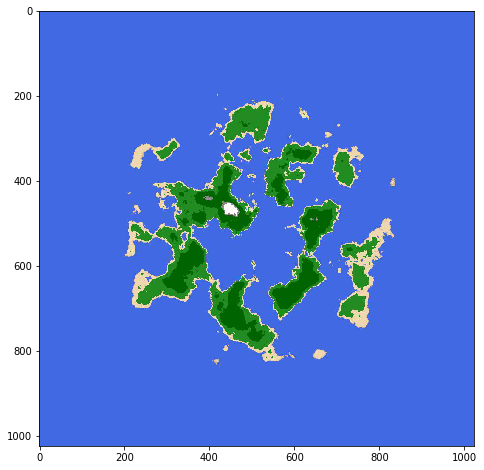

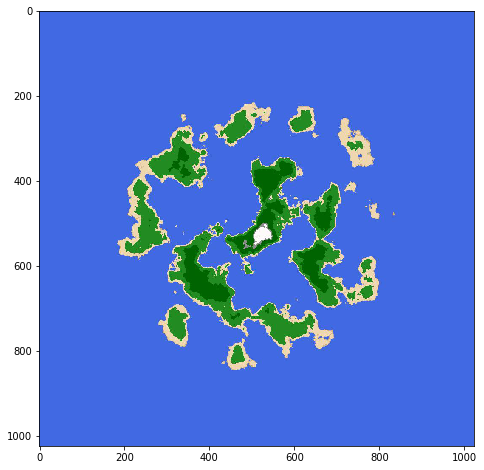

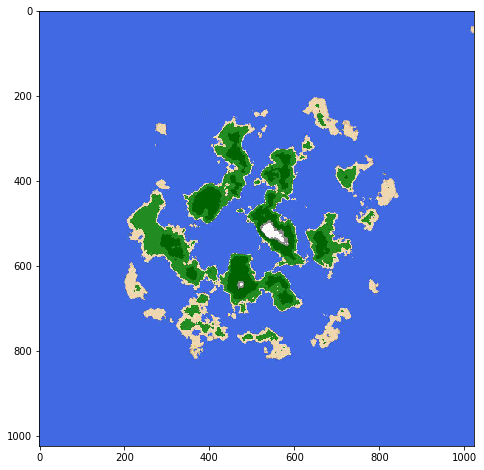

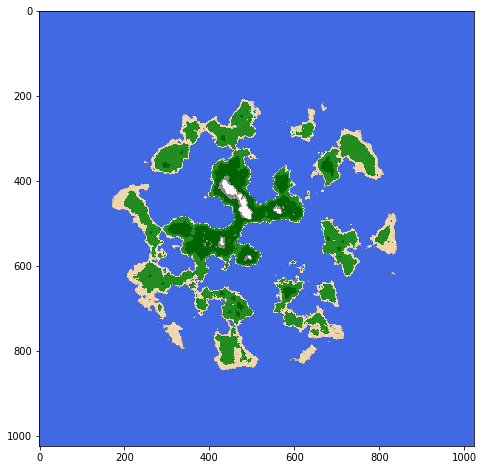

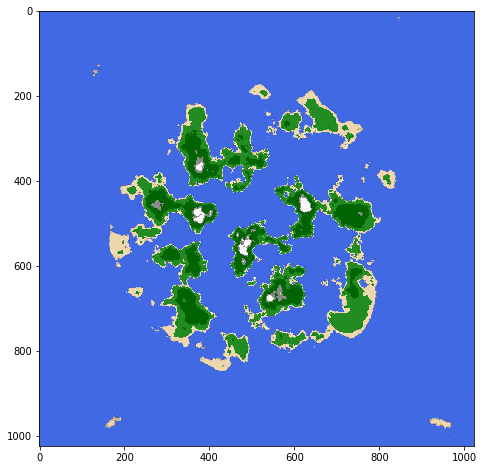

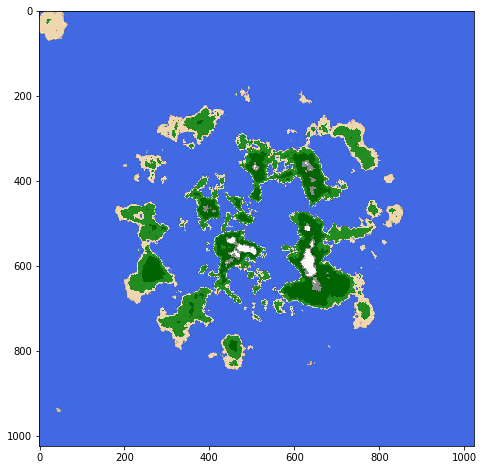

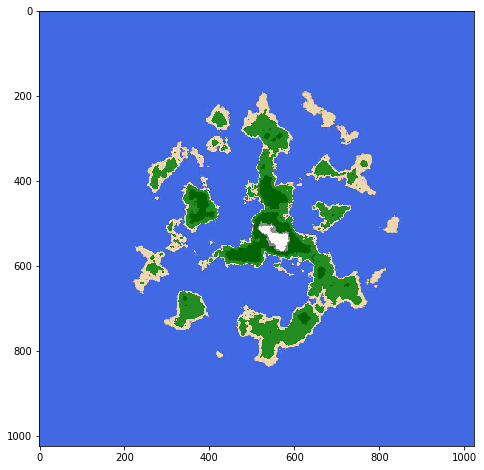

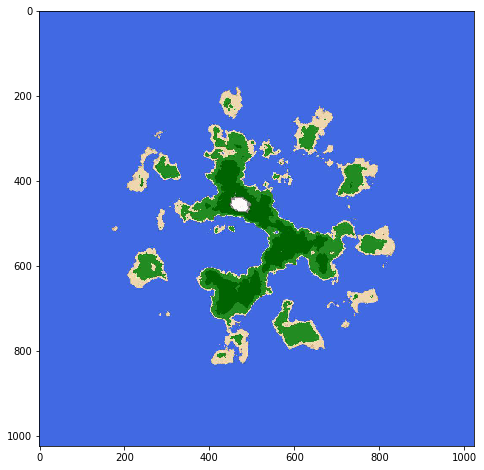

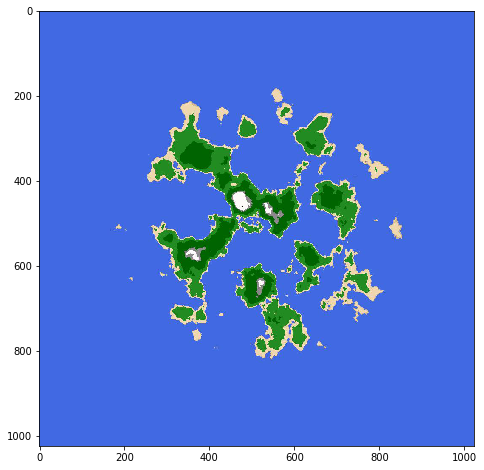

In [313]:
# base plots
for i in range(10):
    world_noise = create_world_noise(i)
    island_world_grad = add_color2(world_noise)
    show_rgb(island_world_grad, 8)